# Project Proposal

# 1. Title of the Project: 
### Heart Failure Prediction

# 2. Brief on the project:
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. 
The dataset consist of independent variables as:
0_ age
1_ anaemia
2_ creatinine_phosphokinase
3_ diabetes
4_ ejection_fraction
5_ high_blood_pressure
6_ platelets
7_ serum_creatinine
8_ serum_sodium
9_ sex
10_ smoking
11_ time
and dependent variable as "DEATH_EVENT".

# 3. Deliverables of the project:
General approach would be collecting & analysing the data, Feature selection & engineering the data, Outlier detection & treatment, Missing value detection & treatment and finally model building to check training & testing accuracy. Various models will be build like logistics regression, decision tree, random forest, KNN, GNB, ADA Boost, XG Boost etc. Accuracy score shall be compared to select the best model.

# 4. Objective: 
To create a classification filter (using various Machine Learning algorithms) to predict hear failure. Compare the performance of the filters.


# 5. Resources:
### Data source- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
### Software- Jupyter notebook

# 6. Individual Details:
#### Name: Vidit Kumar Pal  E-mail: vidit.20.pal@gmail.com  Phone number: +917985431988

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

In [2]:
#Collecting the data
hf=pd.read_csv('heart_failure_clinical_records.csv')

In [3]:
hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
#analysing the data
hf.shape

(299, 13)

In [5]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
hf.tail()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [7]:
hf.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
hf.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
hf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [30]:
hf.nunique

<bound method DataFrame.nunique of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  ser

In [41]:
cat_cols=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
num_cols=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
hf_cat=pd.DataFrame(hf[cat_cols])
hf_num=pd.DataFrame(hf[num_cols])

In [42]:
hf_cat

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


In [43]:
hf_num

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


# After analysing the data, below are the observations,
1. There are 300 rows & 13 columns
2. There are no missing values
3. Target variable is Death_event.
4. Target variable values are 0 and 1
5. Categorical Data :anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT (YES(1) / NO(0))
6. Numerical Data: age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time

In [44]:
#Numerical Analysis
hf_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0


In [45]:
print(hf_cat["DEATH_EVENT"].value_counts())

0    203
1     96
Name: DEATH_EVENT, dtype: int64


## as we can see that data is imbalance

# EDA PART

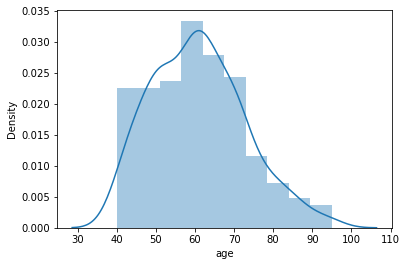

<Figure size 1080x360 with 0 Axes>

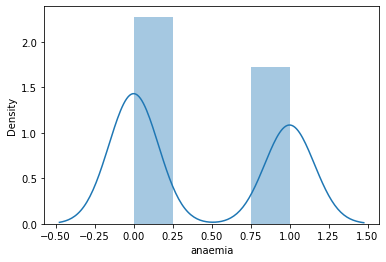

<Figure size 1080x360 with 0 Axes>

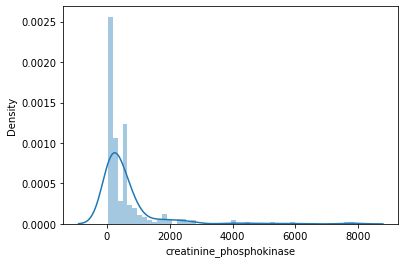

<Figure size 1080x360 with 0 Axes>

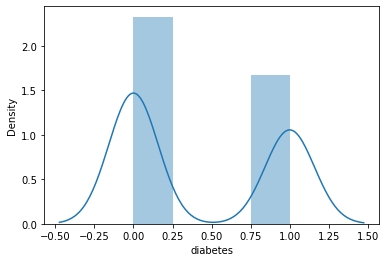

<Figure size 1080x360 with 0 Axes>

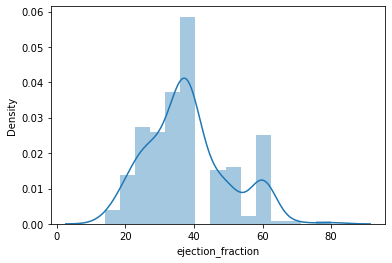

<Figure size 1080x360 with 0 Axes>

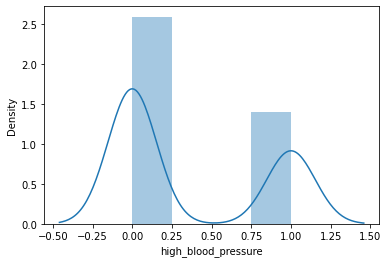

<Figure size 1080x360 with 0 Axes>

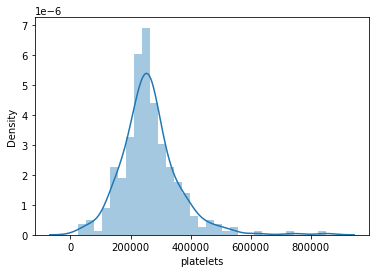

<Figure size 1080x360 with 0 Axes>

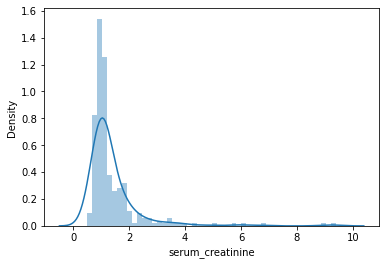

<Figure size 1080x360 with 0 Axes>

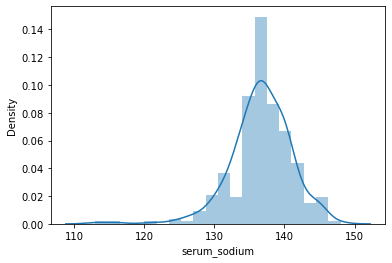

<Figure size 1080x360 with 0 Axes>

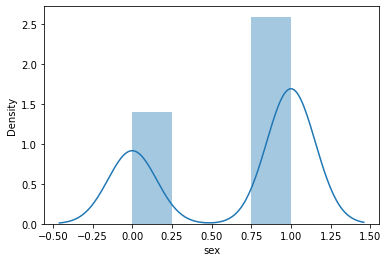

<Figure size 1080x360 with 0 Axes>

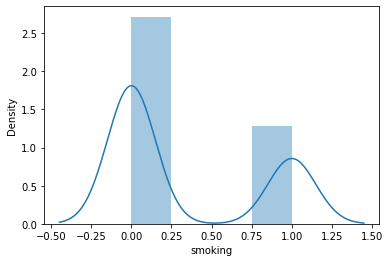

<Figure size 1080x360 with 0 Axes>

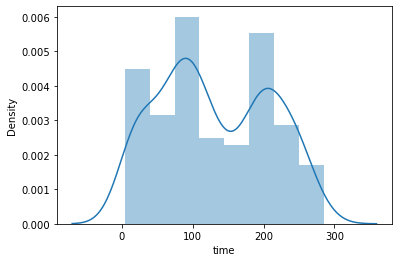

<Figure size 1080x360 with 0 Axes>

In [19]:
#quality check of the data
for i in ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',]:
    sns.distplot(hf[i])
    plt.figure(figsize=[15,5])
    plt.show()

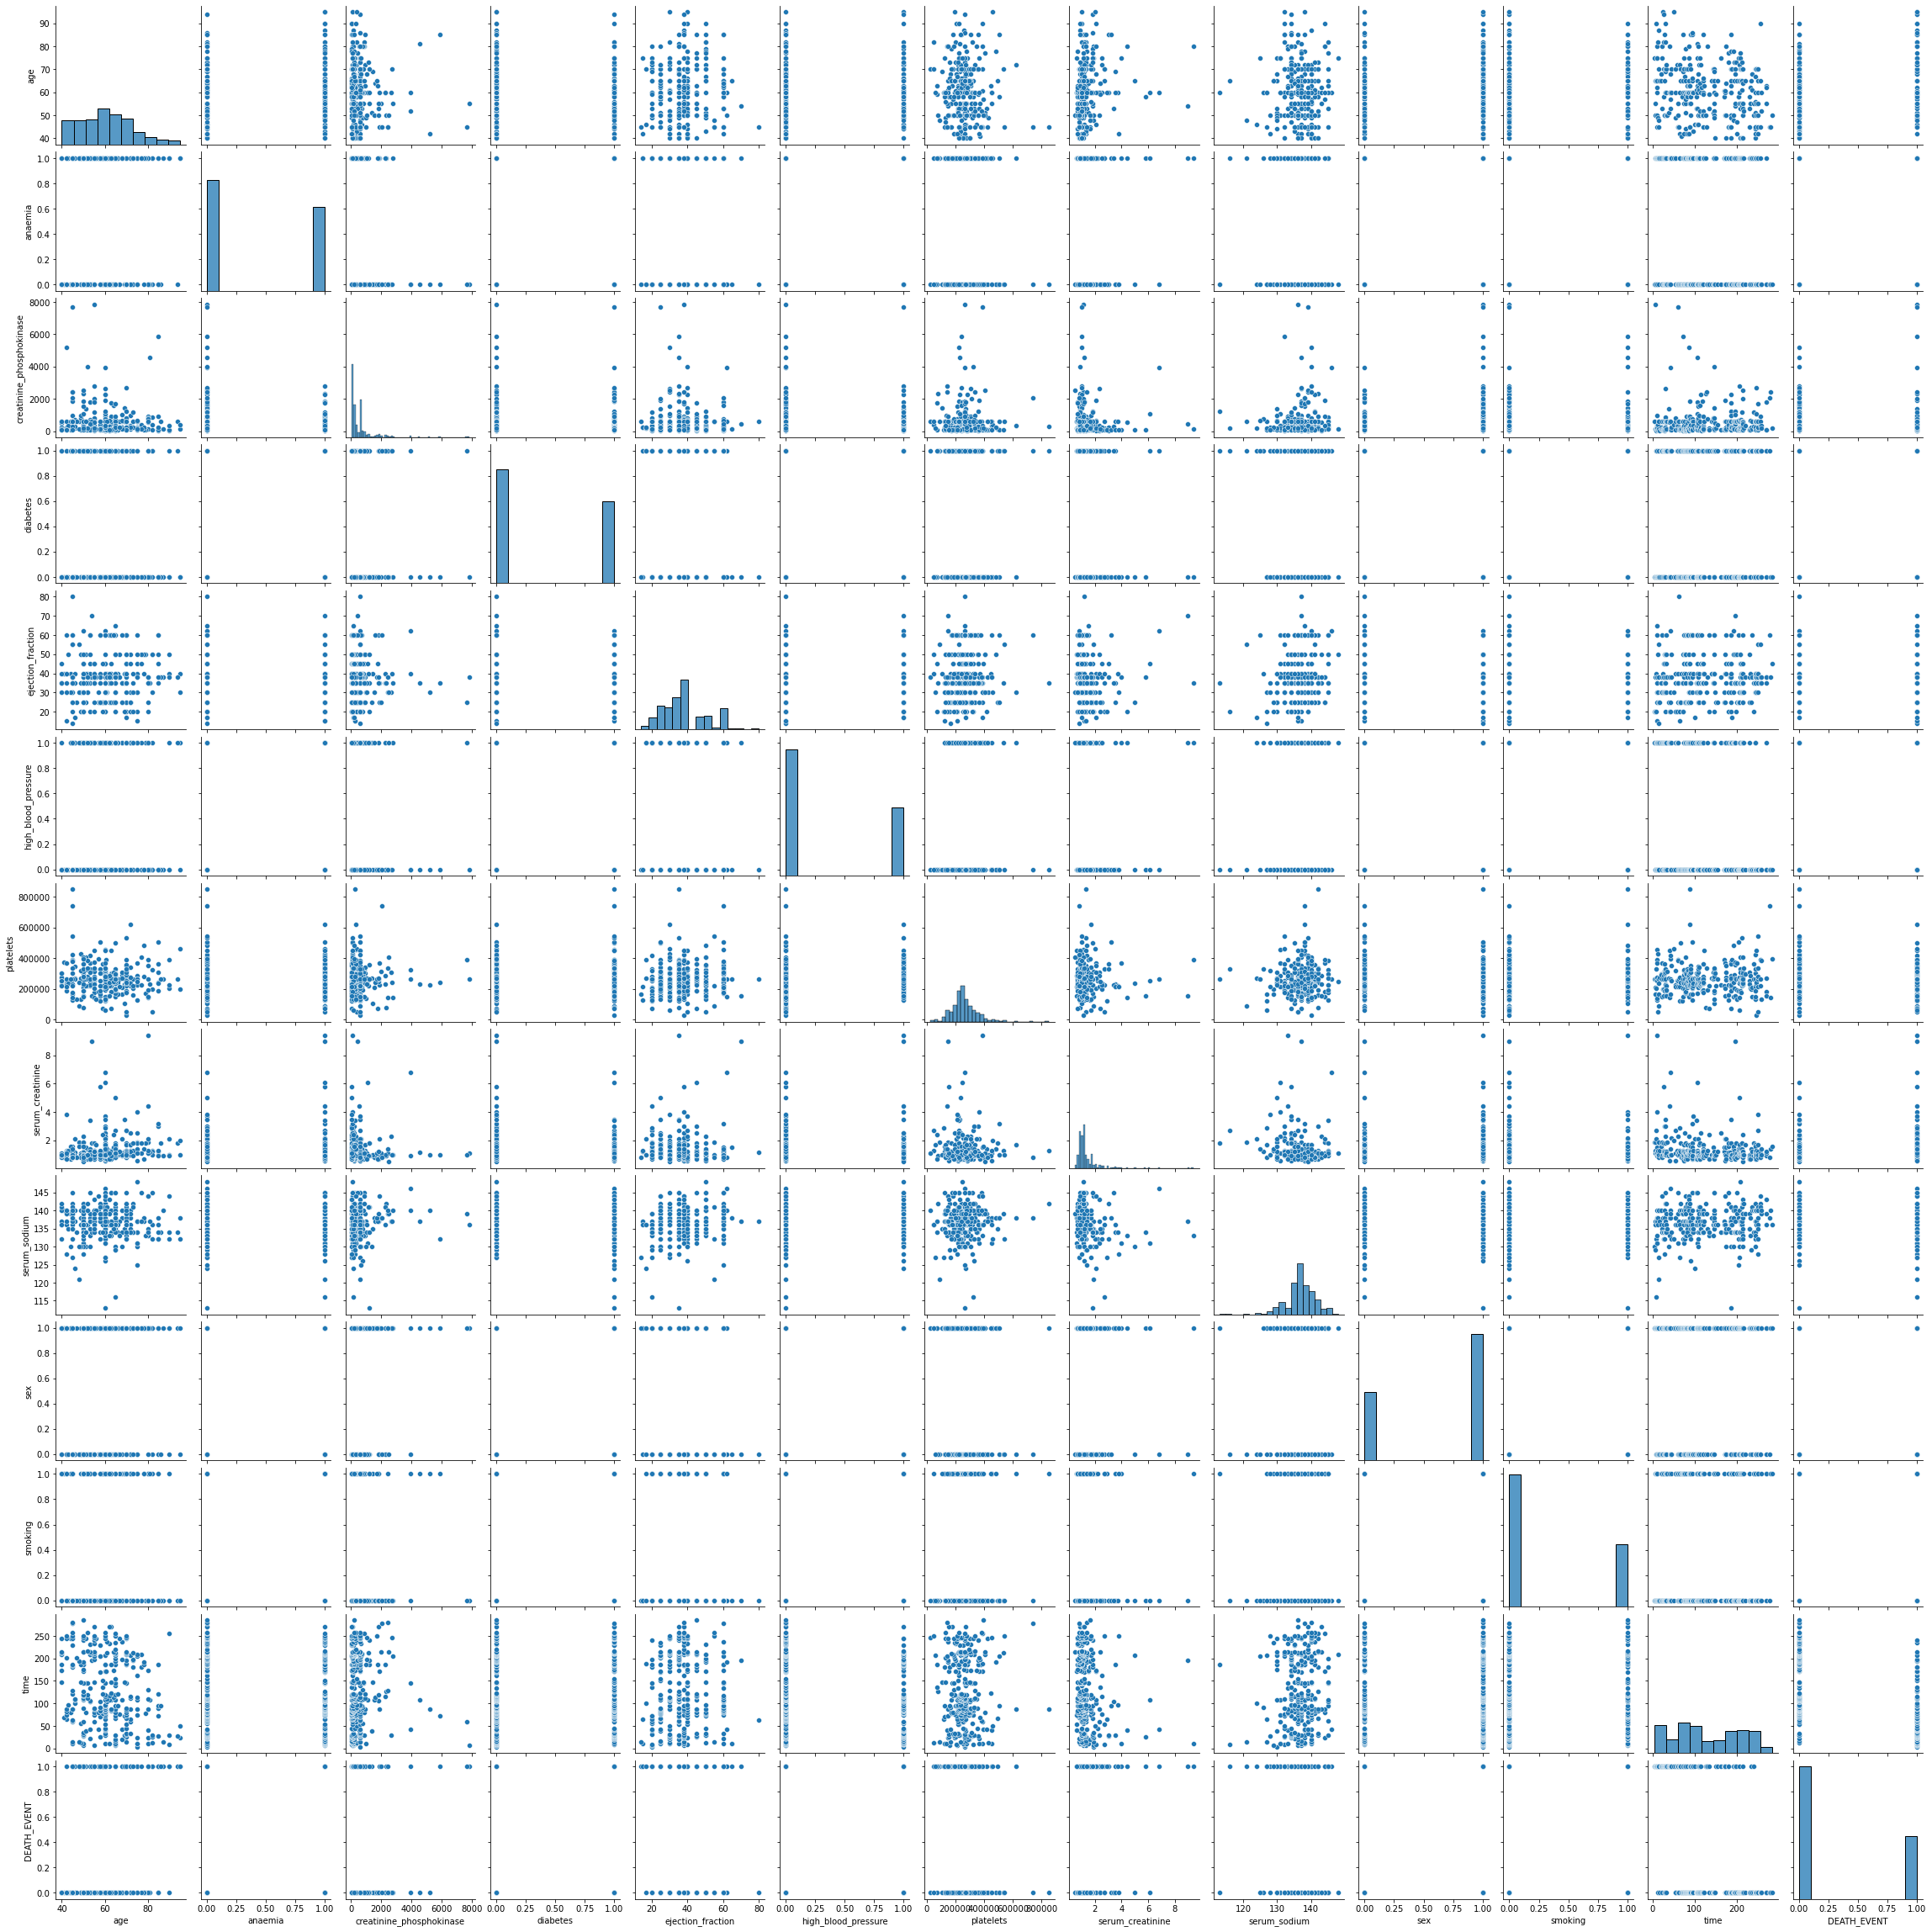

In [49]:
#checking correlation using pairplot
sns.pairplot(hf)

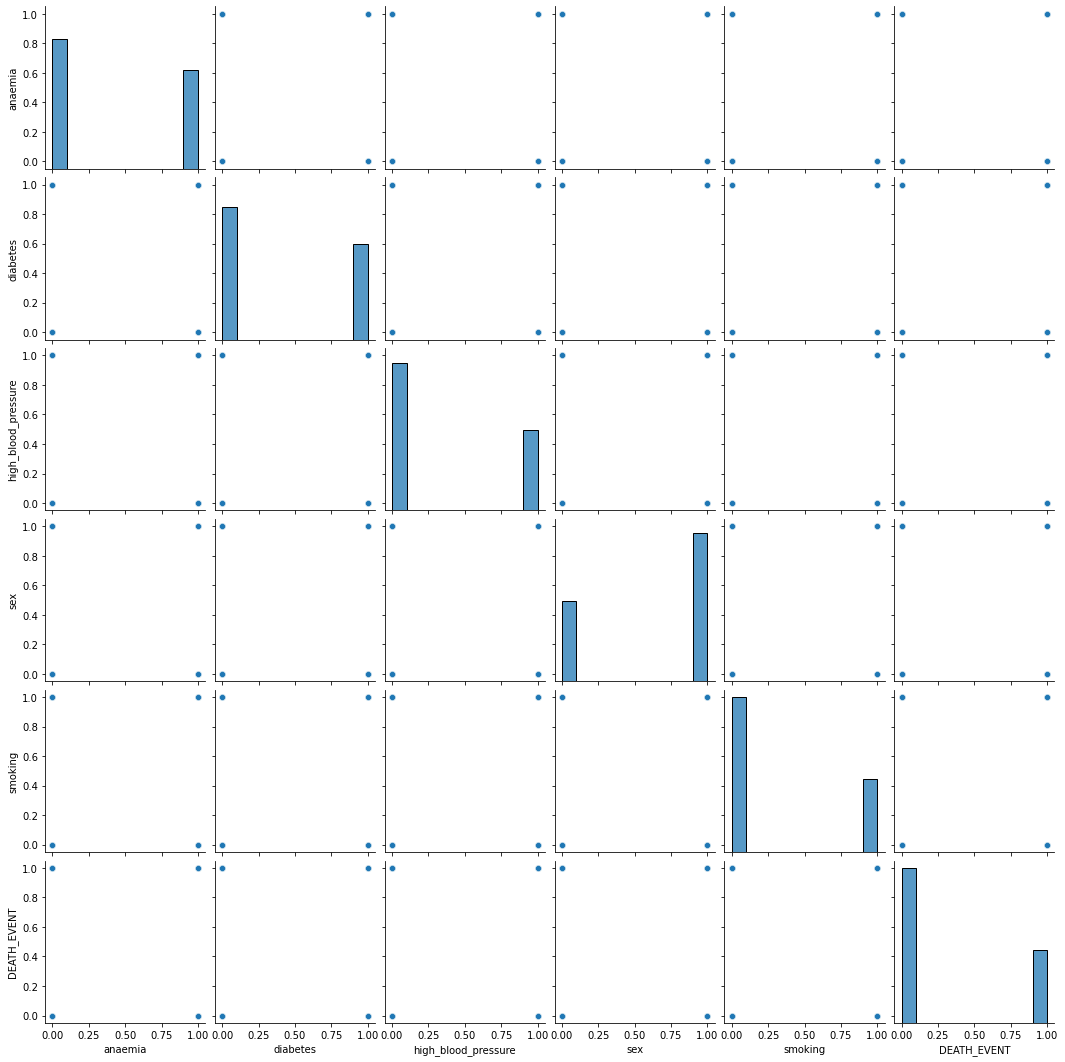

In [47]:
sns.pairplot(hf_cat)

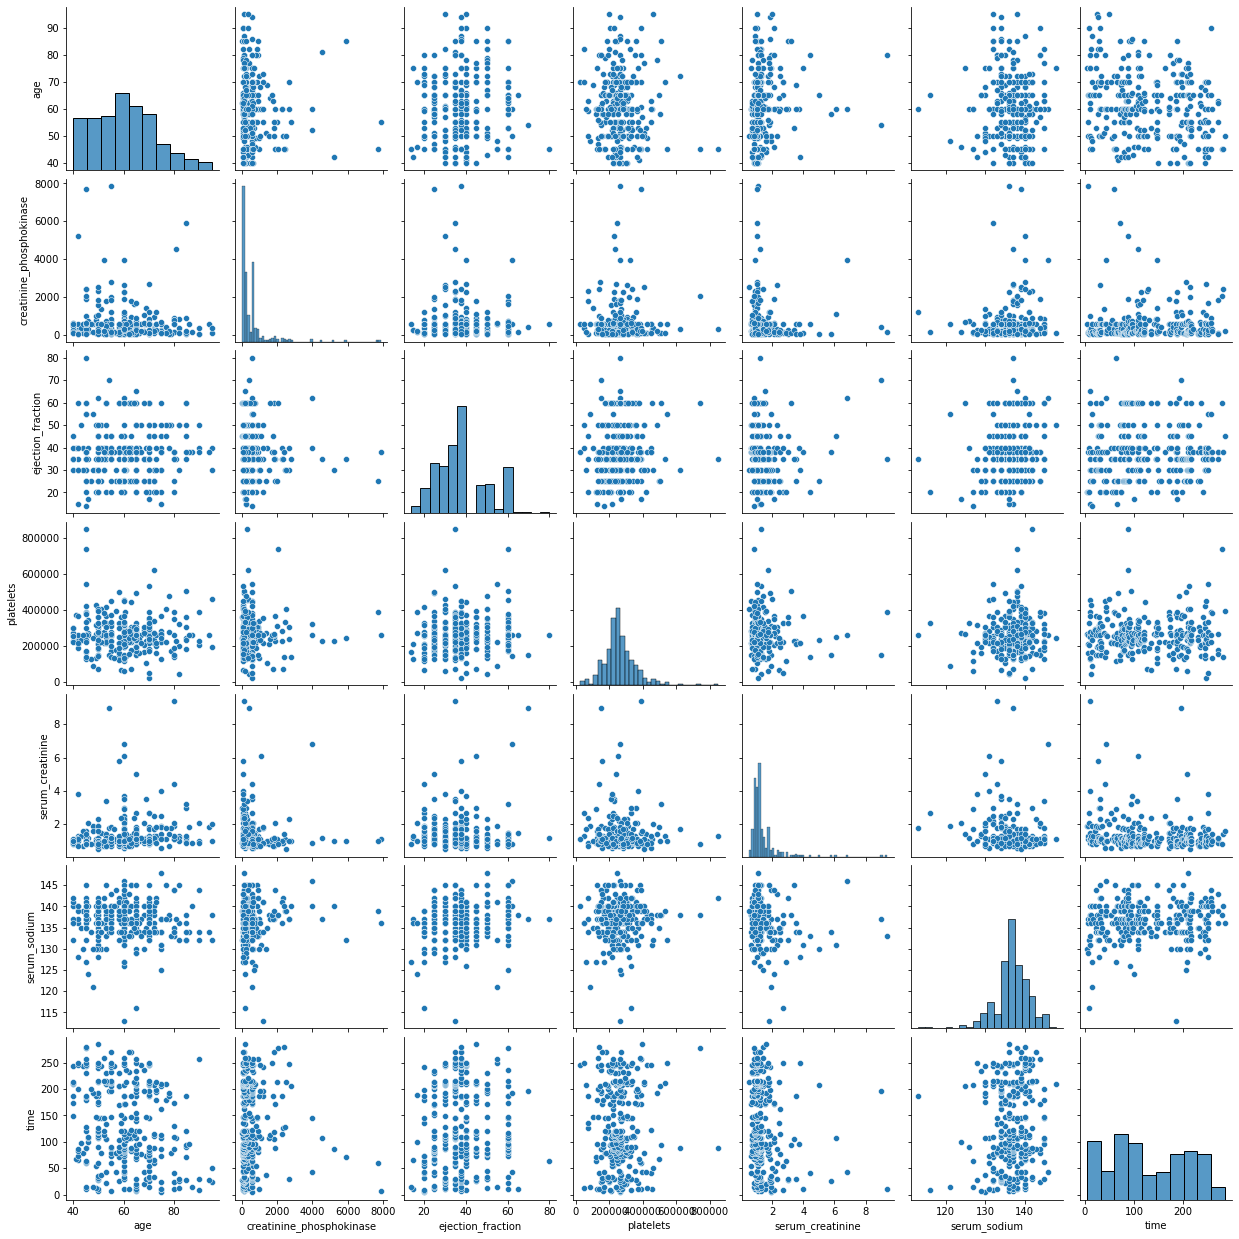

In [48]:
sns.pairplot(hf_num)

<Figure size 1440x1440 with 0 Axes>

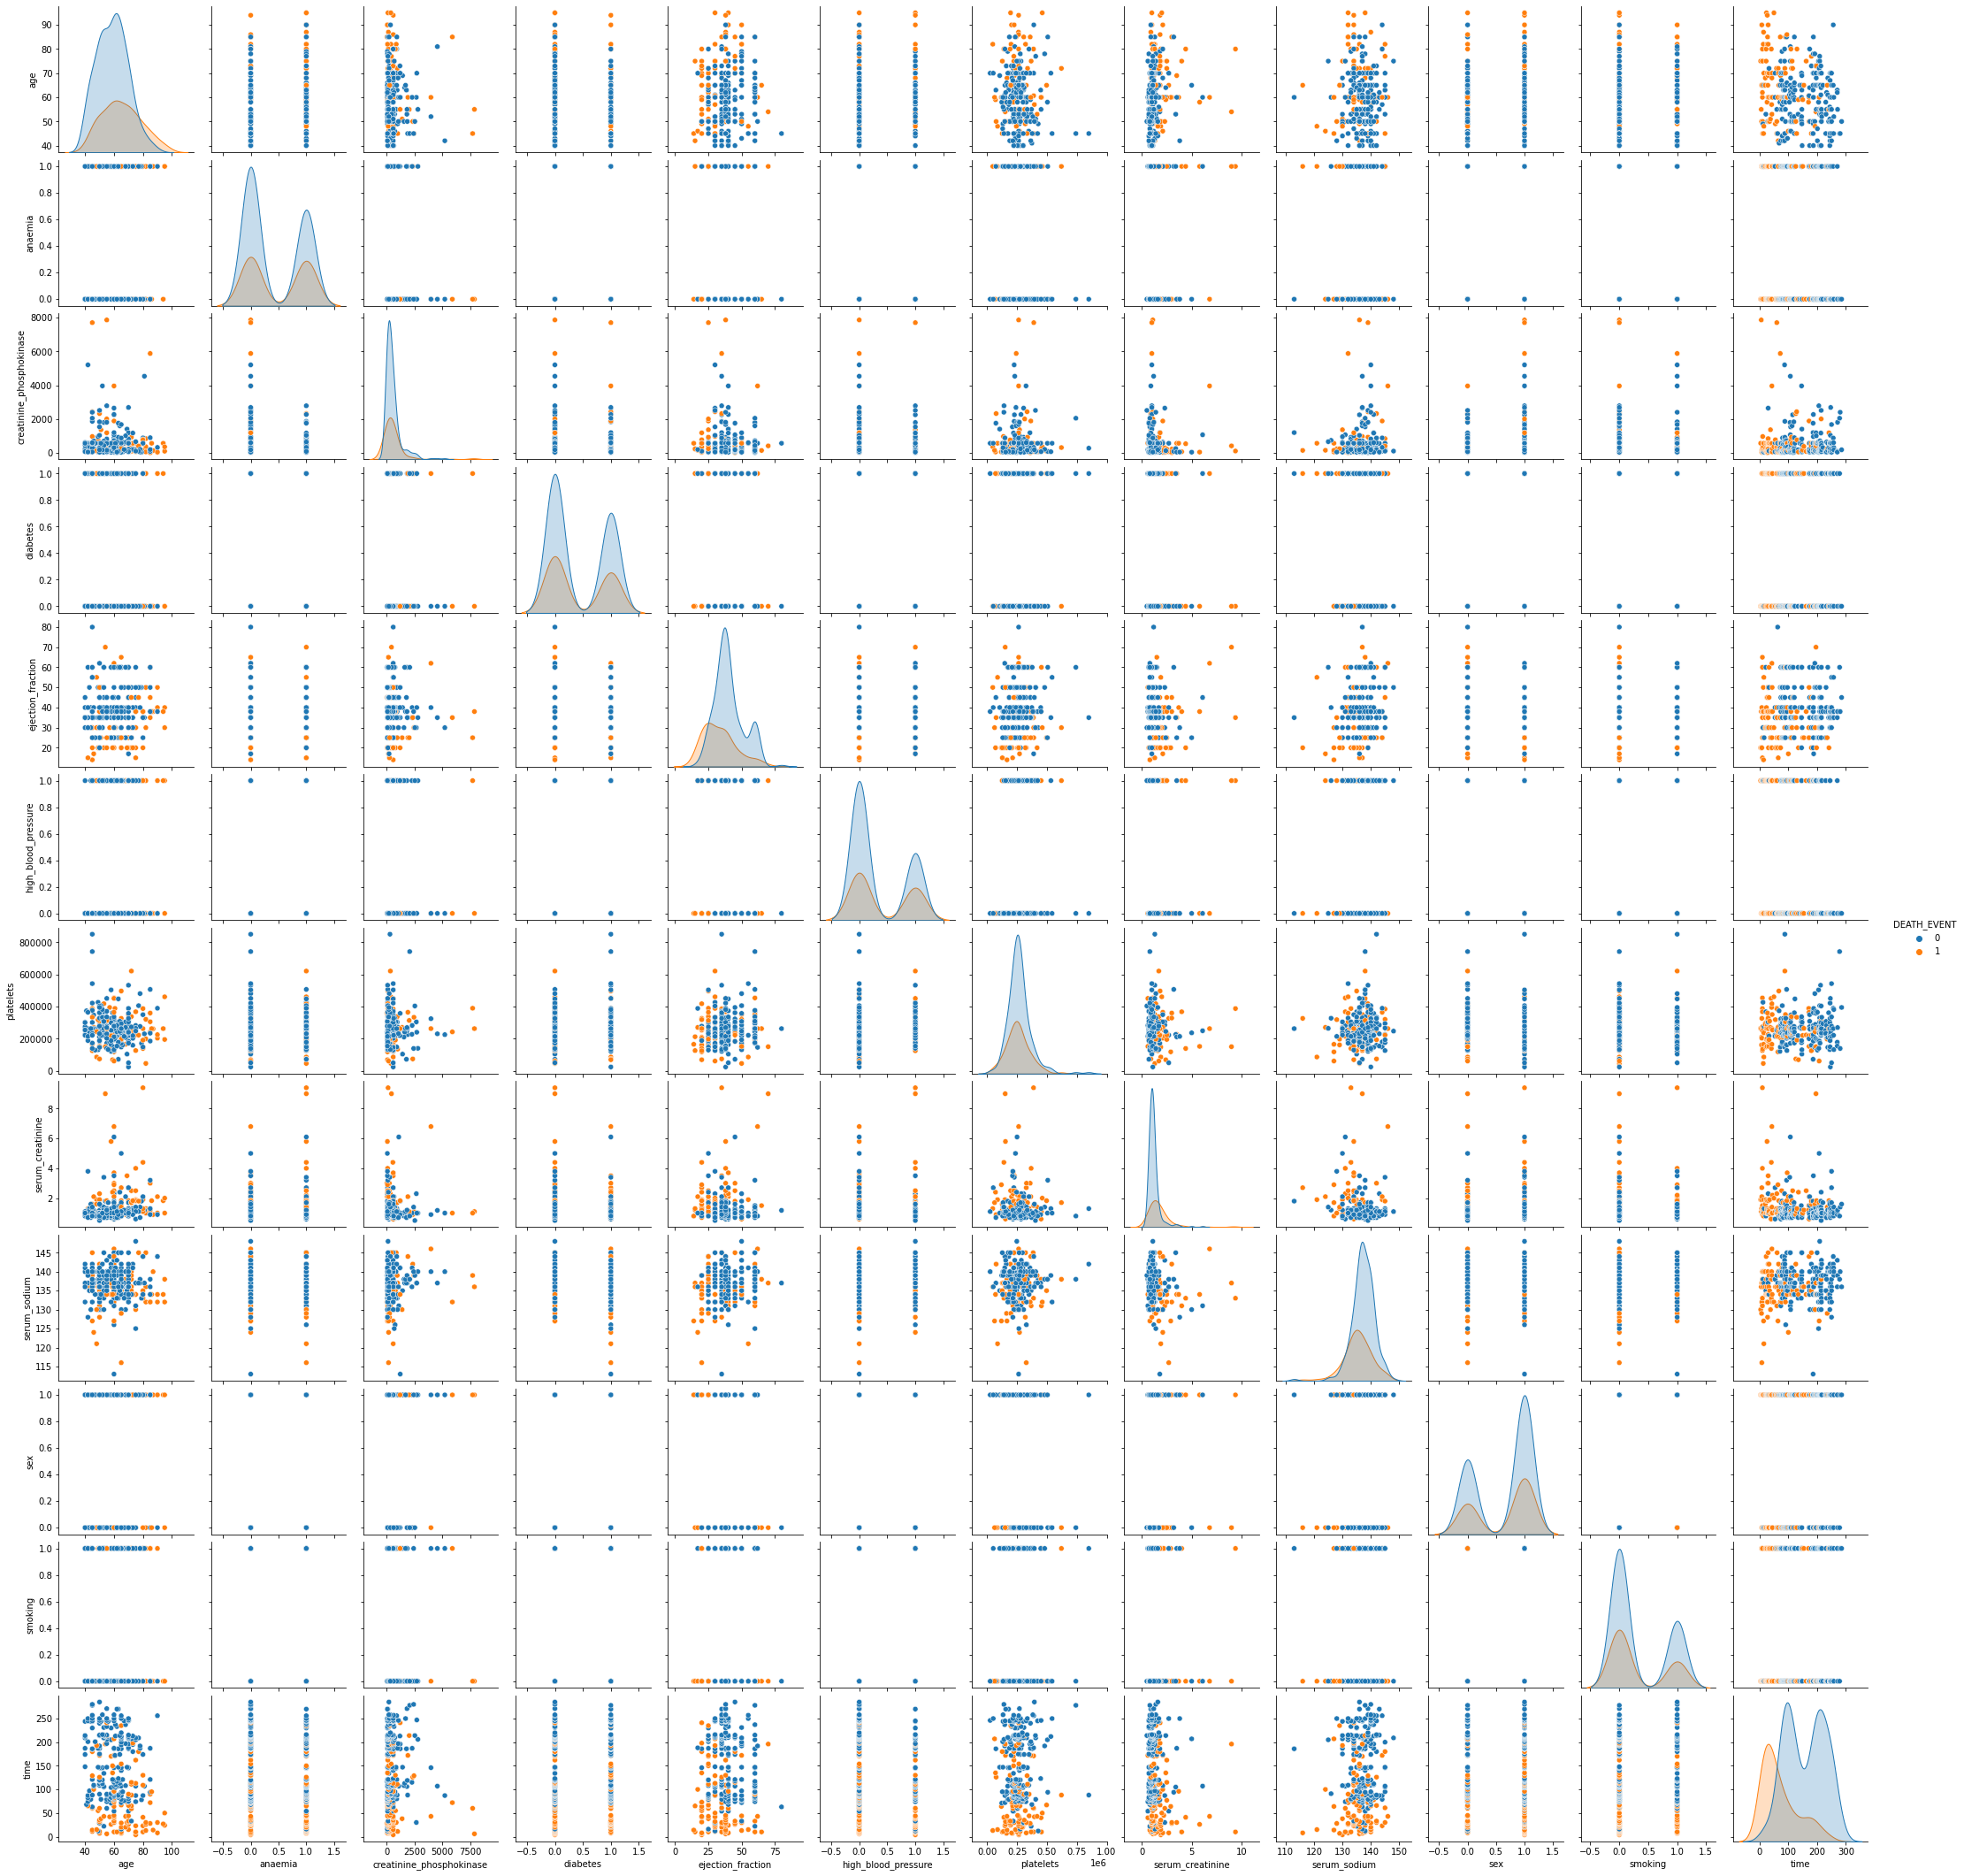

In [21]:
#pairplot w.r.t dependent variable "DEATH_EVENT"
plt.figure(figsize=[20,20])
sns.pairplot(hf, hue='DEATH_EVENT')

<AxesSubplot:>

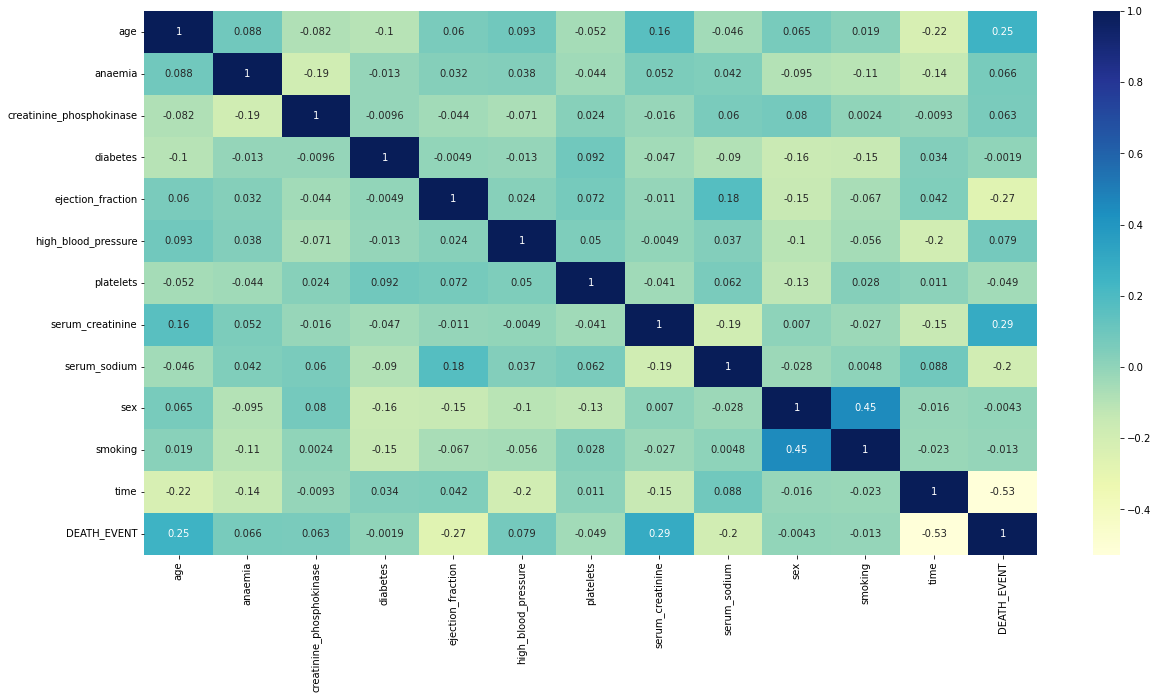

In [56]:
#heatmap to check corelation with the help of numeric values
plt.figure(figsize=(20,10))
sns.heatmap(hf.corr(),annot=True, cmap='YlGnBu')

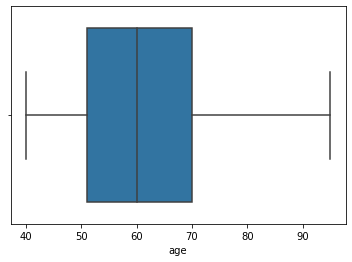

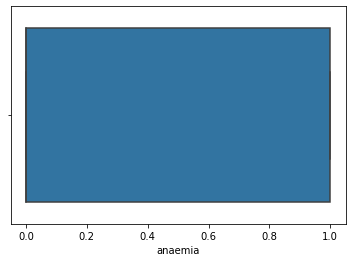

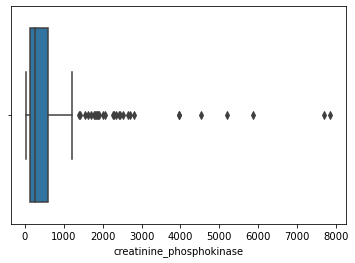

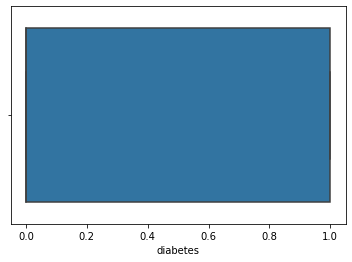

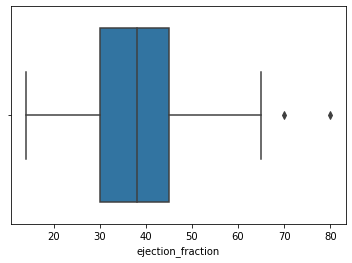

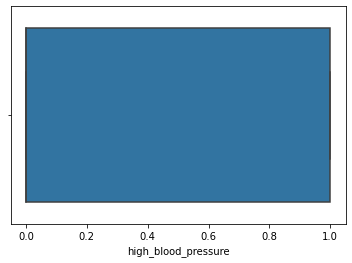

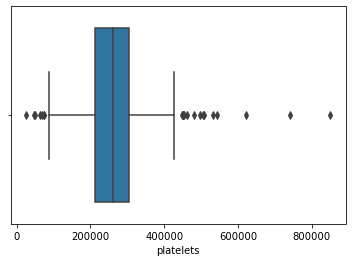

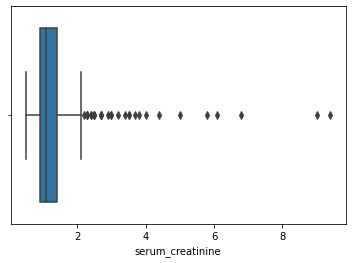

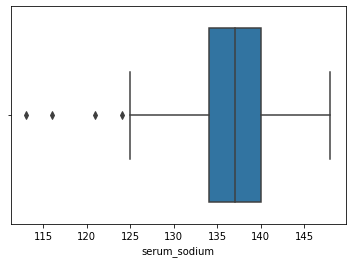

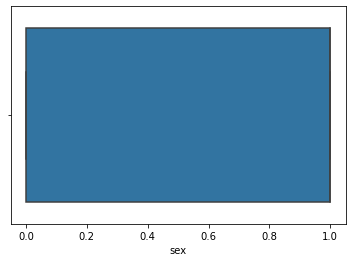

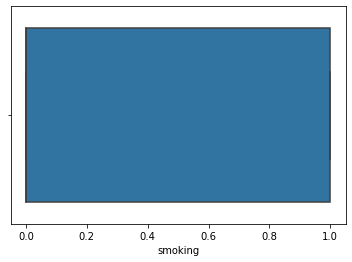

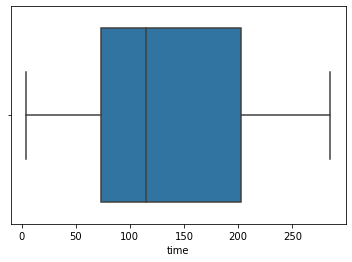

In [23]:
# checking for outliers in data set
for i in ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']:
    sns.boxplot(data=hf, x=i)
    plt.show()

cretinine_phosphokinase, ejection_fraction, platelets, serum_creatinine and serum_sodium have outliers in them

In [24]:
def outlierdetection(hf):
    sorted(hf)
    Q1,Q3=np.percentile(hf,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    Upper_range=Q3+(1.5*IQR)
    return lower_range,Upper_range

In [72]:
hf_num.rename(columns={'creatinine_phosphokinase':'cp','ejection_fraction':'ef','serum_creatinine':'sc','serum_sodium':'ss'},inplace=True)
hf_num

,age,cp,ef,platelets,sc,ss,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [78]:
min(hf_num['cp'])

23

In [139]:
for i in ['cp','ef','platelets','sc','ss']:
    minimum,maximum=outlierdetection(hf_num[i])
    print("maximum "+i+" value is :",maximum)
    print("minimum "+i+" value is :",minimum)
    print("="*20)


maximum cp value is : 1280.25
minimum cp value is : -581.75
maximum ef value is : 67.5
minimum ef value is : 7.5
maximum platelets value is : 440000.0
minimum platelets value is : 76000.0
maximum sc value is : 2.1499999999999995
minimum sc value is : 0.15000000000000024
maximum ss value is : 149.0
minimum ss value is : 125.0


## Model Building using dependent variable "DEATH_EVENT"

In [86]:
x=hf.drop('DEATH_EVENT',axis=1)
y=hf['DEATH_EVENT']

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## Logistic Regression

In [88]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [89]:
prediction=logmodel.predict(x_test)

In [90]:
confusion_matrix(y_test,prediction)


array([[56,  8],
       [ 9, 17]], dtype=int64)

In [91]:
accuracy_score(y_test,prediction)

0.8111111111111111

In [92]:
report=classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        64
           1       0.68      0.65      0.67        26

    accuracy                           0.81        90
   macro avg       0.77      0.76      0.77        90
weighted avg       0.81      0.81      0.81        90



## Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [95]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4109848484848485, 0.95, 'X[11] <= 73.5\ngini = 0.446\nsamples = 209\nvalue = [139, 70]'),
 Text(0.15151515151515152, 0.85, 'X[8] <= 136.5\ngini = 0.27\nsamples = 56\nvalue = [9, 47]'),
 Text(0.06060606060606061, 0.75, 'X[7] <= 0.85\ngini = 0.117\nsamples = 32\nvalue = [2, 30]'),
 Text(0.030303030303030304, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09090909090909091, 0.65, 'X[4] <= 47.5\ngini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(0.06060606060606061, 0.55, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.12121212121212122, 0.55, 'X[1] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.09090909090909091, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15151515151515152, 0.45, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.24242424242424243, 0.75, 'X[8] <= 139.5\ngini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.21212121212121213, 0.65, 'X[11] <= 11.5\ngini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.1818181818181818

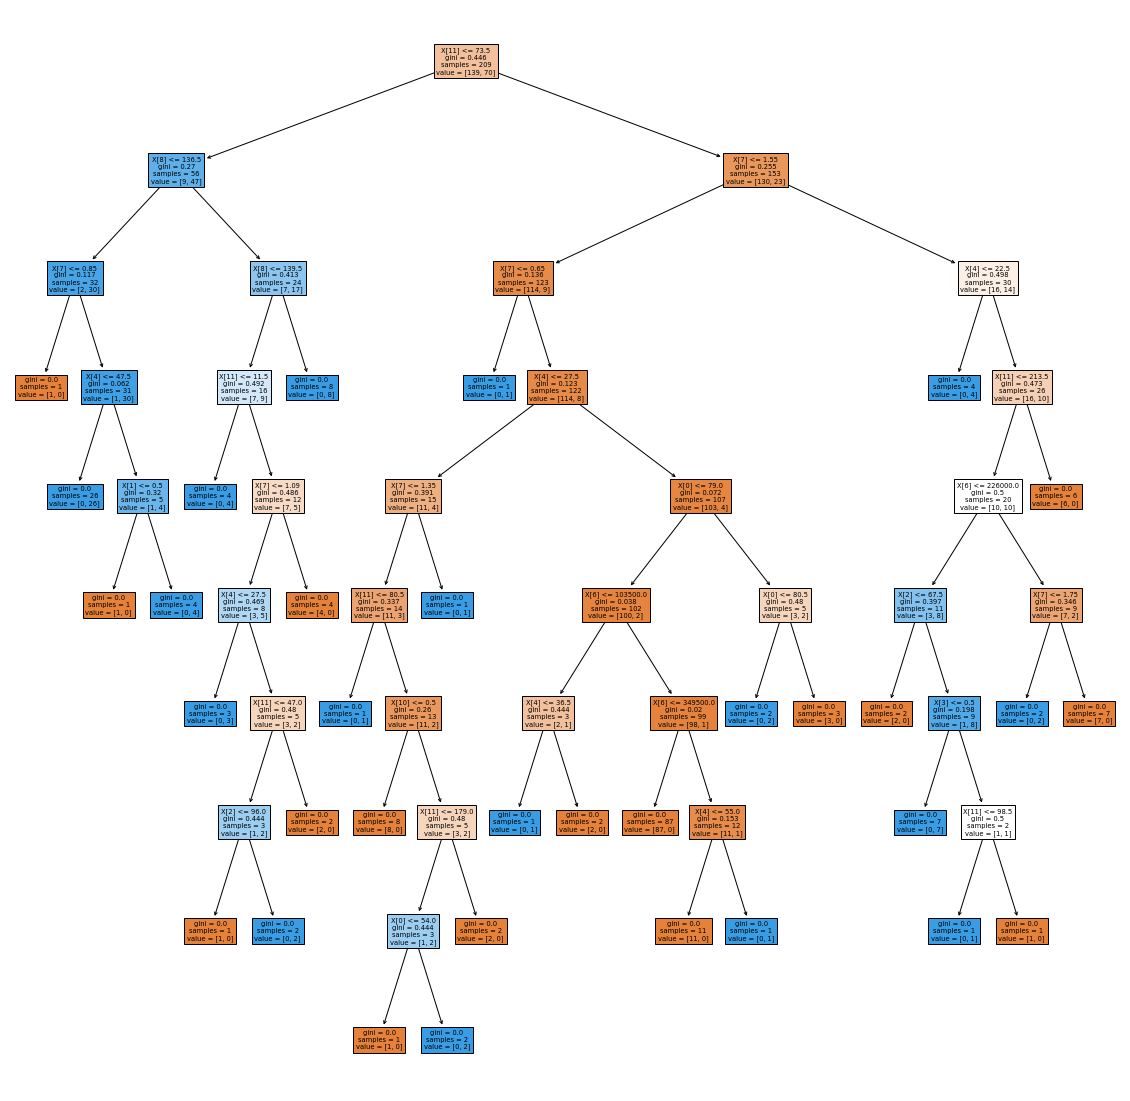

In [96]:
plt.figure(figsize=[20,20])
tree.plot_tree(dt_model, filled=True)

In [97]:
prediction=dt_model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [98]:
confusion_matrix(y_test,prediction)

array([[55,  9],
       [10, 16]], dtype=int64)

In [99]:
accuracy_score(y_test,prediction)

0.7888888888888889

In [100]:
report=classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        64
           1       0.64      0.62      0.63        26

    accuracy                           0.79        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.79      0.79      0.79        90



In [101]:
dt_model.score(x_train,y_train)

1.0

## Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [104]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
prediction=rf.predict(x_test)

In [106]:
confusion_matrix(y_test,prediction)

array([[61,  3],
       [ 7, 19]], dtype=int64)

In [107]:
report=classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        64
           1       0.86      0.73      0.79        26

    accuracy                           0.89        90
   macro avg       0.88      0.84      0.86        90
weighted avg       0.89      0.89      0.89        90



In [108]:
accuracy_score(y_test,prediction)

0.8888888888888888

In [109]:
rf.score(x_train,y_train)

1.0

## K-Nearest Neighbors

In [110]:
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics as sm

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [112]:
knn=neighbors.KNeighborsClassifier()


In [113]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [114]:
prediction=knn.predict(x_test)

In [115]:
confusion_matrix(y_test,prediction)

array([[53, 11],
       [24,  2]], dtype=int64)

In [116]:
accuracy_score(y_test,prediction)

0.6111111111111112

In [117]:
score=classification_report(y_test,prediction)
print(score)

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        64
           1       0.15      0.08      0.10        26

    accuracy                           0.61        90
   macro avg       0.42      0.45      0.43        90
weighted avg       0.53      0.61      0.56        90



## Gaussian Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [120]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [121]:
prediction=gnb.predict(x_test)

In [122]:
confusion_matrix(y_test,prediction)

array([[61,  3],
       [11, 15]], dtype=int64)

In [123]:
accuracy_score(y_test,prediction)

0.8444444444444444

In [124]:
report=classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        64
           1       0.83      0.58      0.68        26

    accuracy                           0.84        90
   macro avg       0.84      0.77      0.79        90
weighted avg       0.84      0.84      0.83        90



## ADA Boost


In [125]:
from sklearn.ensemble import AdaBoostClassifier

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [127]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [128]:
prediction=abc.predict(x_test)

In [129]:
confusion_matrix(y_test,prediction)

array([[58,  6],
       [10, 16]], dtype=int64)

In [130]:
accuracy_score(y_test,prediction)

0.8222222222222222

In [131]:
report=classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        64
           1       0.73      0.62      0.67        26

    accuracy                           0.82        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.82      0.82      0.82        90



## Gradient Boost

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [134]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [135]:
prediction=gbc.predict(x_test)

In [136]:
confusion_matrix(y_test,prediction)

array([[59,  5],
       [ 8, 18]], dtype=int64)

In [137]:
accuracy_score(y_test,prediction)

0.8555555555555555

In [138]:
report=classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        64
           1       0.78      0.69      0.73        26

    accuracy                           0.86        90
   macro avg       0.83      0.81      0.82        90
weighted avg       0.85      0.86      0.85        90



## Conclusion:
From the above machine learning models for dependent variable as "DEATH_COUNT", accuracy score of each models are:
1. Logistics Regression: 81%
2. Decision tree: 79%
3. Random Forest: 89%
4. K-Nearest Neighbors: 61%
5. Gaussian Naive Bayes: 84%
6. ADA Boost:82%
7. Gradient Boost: 86%

Therefore, to predict the Heart Failure, best performing models in terms of accuracy score are Random Forest (89%), Gradient Boost (86%) and Gaussian Naive Bayes (84%).